In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv('mail_data.csv')
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [33]:
df.describe(include='all').transpose()

,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5157,"Sorry, I'll call later",30


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [35]:
df['Length'] = df['Message'].apply(len)

In [36]:
cat_dic = {'spam':0, 'ham':1}
df['Category'] = df['Category'].map(cat_dic)
df.tail()

,Category,Message,Length
5567,0,This is the 2nd time we have tried 2 contact u...,160
5568,1,Will ü b going to esplanade fr home?,36
5569,1,"Pity, * was in mood for that. So...any other s...",57
5570,1,The guy did some bitching but I acted like i'd...,125
5571,1,Rofl. Its true to its name,26


<AxesSubplot:xlabel='Length', ylabel='Count'>

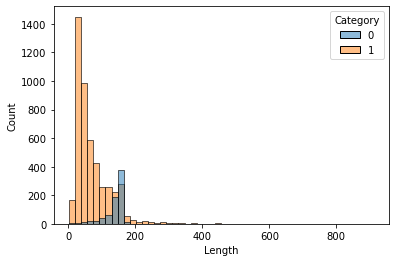

In [61]:
import seaborn as sns
sns.histplot(x=df['Length'], bins=50, hue=df['Category'])

In [62]:
df['Category'].corrwith(df['Le'])

,Category,Length
Category,1.000000,-0.378359
Length,-0.378359,1.000000


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df.drop('Category', axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
vectorizer = TfidfVectorizer(stop_words='english')

In [41]:
train_vector = vectorizer.fit_transform(X_train['Message'])
test_vector = vectorizer.transform(X_test['Message'])

In [44]:
X_train_vectorized = pd.concat([pd.DataFrame(train_vector.toarray()), X_train['Length'].reset_index(drop=True)], axis=1)
X_test_vectorized = pd.concat([pd.DataFrame(test_vector.toarray()), X_test['Length'].reset_index(drop=True)], axis=1)

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
model = MultinomialNB()

In [47]:
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [48]:
pred = model.predict(X_test_vectorized)

In [51]:
from sklearn.metrics import classification_report, accuracy_score

In [52]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.02      1.00      0.03         4
           1       1.00      0.87      0.93      1835

    accuracy                           0.87      1839
   macro avg       0.51      0.93      0.48      1839
weighted avg       1.00      0.87      0.93      1839



In [53]:
print(accuracy_score(pred, y_test))

0.8684067427949973


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc=RandomForestClassifier()

In [56]:
rfc.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [58]:
pred1 = rfc.predict(X_test_vectorized)

In [59]:
print(classification_report(pred1, y_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       207
           1       1.00      0.98      0.99      1632

    accuracy                           0.98      1839
   macro avg       0.92      0.99      0.95      1839
weighted avg       0.98      0.98      0.98      1839



The Random forest is performing better especially with classifying spam class [0]